<a href="https://colab.research.google.com/github/miriampaul/AnalysisPandasProfilingEDA/blob/main/Kaggle_Bike_Demand_Predictions_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREDICT THE DEMAND FOR BIKES**
Capital Bikeshares available around Metro DC area ,Predict how many Bikes will be required on an hourly basis. Take the datasets from UCI Bike Sharing.


In [596]:
import pyspark
import pandas as pd

In [597]:
dataset=pd.read_csv("/content/hour.csv")

In [598]:
dataset.columns

Index(['index', 'date', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'demand'],
      dtype='object')

In [599]:
dataset.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Steps To solve the bike sharing prediction problem
1. Read the data
2. Preliminary analysis of the data and drop obvious features
3. Visualize the data
4. Check Multiple Linear Regression Assumptions- Normality , Linear Correlation, Multicollinearity, Autocorrelation, Sample size
5. Drop irrelevant features
6. Create/Modify more features
7. Create Dummy variables
8. Train and Test split
9. Fit and score the model
10. Present the results





In [600]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [601]:
#STEP 1 - Read the data
bikes=pd.read_csv("/content/hour.csv")
bikes

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31-12-2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,31-12-2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,31-12-2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,31-12-2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [602]:
#STEP 2- Prelim Analysis and Feature Selection

bikes_prep=bikes.copy()

In [603]:
bikes_prep=bikes_prep.drop(['index','date','casual','registered'],axis=1)

In [604]:
bikes_prep

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [605]:
#BASIC ANALYSIS OF THE DATA

In [606]:
#Basic checks of missing values
bikes_prep.isnull().sum()

,0
season,0
year,0
month,0
hour,0
holiday,0
weekday,0
workingday,0
weather,0
temp,0
atemp,0


In [607]:
#Visualizate the Data using Pandas histogram

array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'hour'}>],
       [<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'demand'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

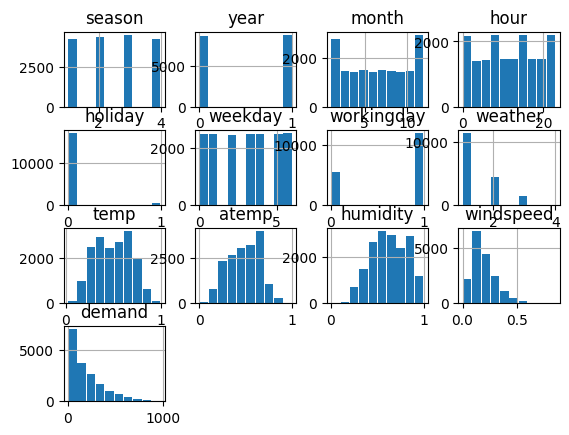

In [608]:
bikes_prep.hist(rwidth=0.9)

array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'hour'}>],
       [<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'demand'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

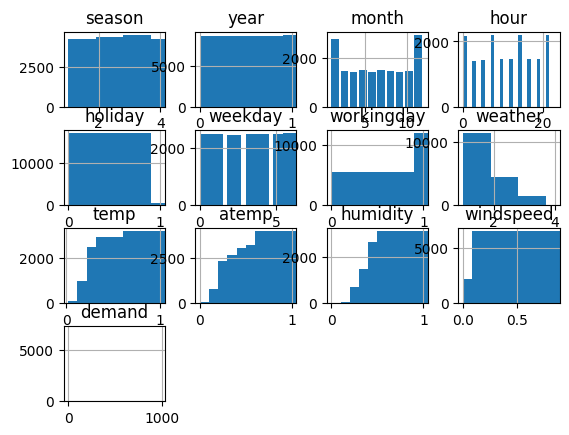

In [609]:
bikes_prep.hist(width=0.9)

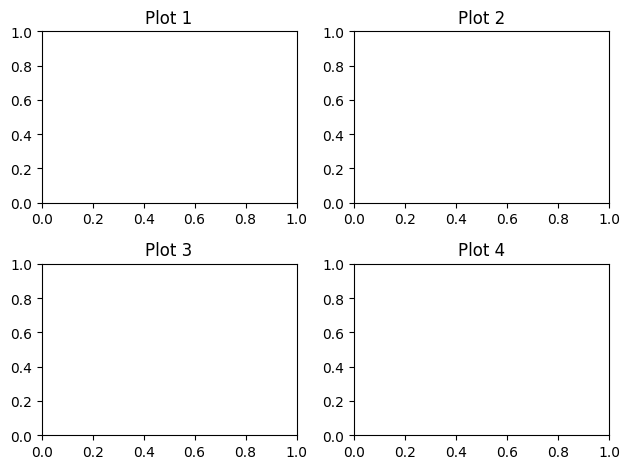

In [610]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 2)

# Add titles to subplots
axes[0, 0].set_title("Plot 1")
axes[0, 1].set_title("Plot 2")
axes[1, 0].set_title("Plot 3")
axes[1, 1].set_title("Plot 4")

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


In [611]:
#PREDICTED VARIABLE IS NOT NORMALY DISTRIBUTED

In [612]:
bikes_prep

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [613]:
#STEP 3 Data Visualization
#VISUALIZE THE CONTINUOUS FEATURES VS DEMAND


<Axes: >

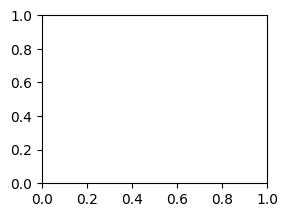

In [614]:
plt.subplot(2,2,1)

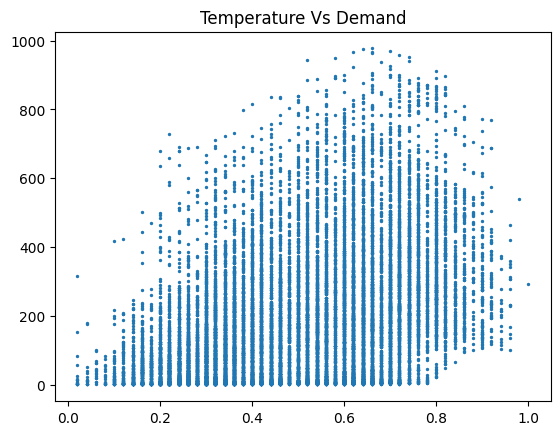

In [615]:
plt.title('Temperature Vs Demand')
plt.scatter(bikes_prep['temp'], bikes_prep['demand'],s=2)

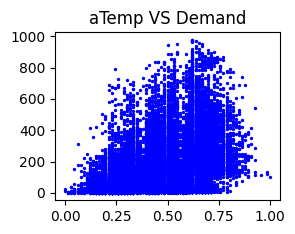

In [616]:
plt.subplot(2,2,2)
plt.title('aTemp VS Demand')
plt.scatter(bikes_prep['atemp'], bikes_prep['demand'], s=2, c='b')

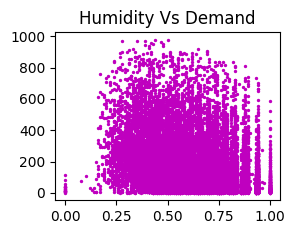

In [617]:
plt.subplot(2,2,3)
plt.title('Humidity Vs Demand')
plt.scatter(bikes_prep['humidity'], bikes_prep['demand'],s=2, c='m')

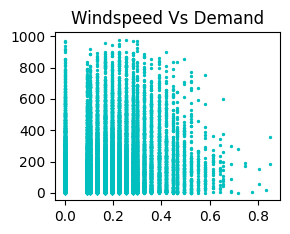

In [618]:
plt.subplot(2,2,4)
plt.title('Windspeed Vs Demand')
plt.scatter(bikes_prep['windspeed'],bikes_prep['demand'],s=2, c='c')

In [619]:
# plt.tight.layout()

Text(0.5, 1.0, 'Average demand per season')

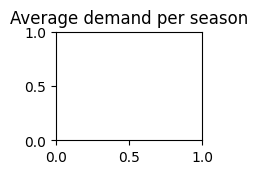

In [620]:
#plot the categorical features vs demand
#Create a 3*3 Subplot
plt.subplot(3,3,1)
plt.title('Average demand per season')

In [621]:
#Create unique seasons values
cat_list=bikes_prep['season'].unique()
cat_list

array([1, 2, 3, 4])

In [622]:
#Create average demand per season using group by
cat_average=bikes_prep.groupby('season').mean()['demand']
cat_average

,demand
season,
1,111.114569
2,208.344069
3,236.016237
4,198.868856


In [623]:
colours=['g','r','m','b']

<BarContainer object of 4 artists>

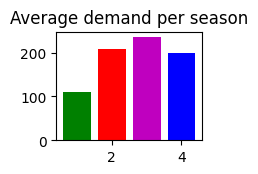

In [624]:
#Create a 3*3 Subplot
plt.subplot(3,3,1)
plt.title('Average demand per season')
plt.bar(cat_list, cat_average, color=colours)

<BarContainer object of 4 artists>

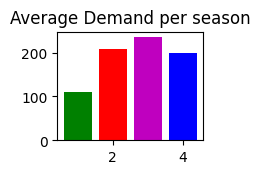

In [625]:
plt.subplot(3,3,1)
plt.title('Average Demand per season')
cat_list=bikes_prep['season'].unique()
cat_average=bikes_prep.groupby('season').mean()['demand']
plt.bar(cat_list,cat_average, color=colours)


<BarContainer object of 12 artists>

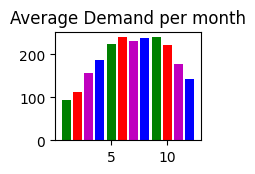

In [626]:
plt.subplot(3,3,2)
plt.title('Average Demand per month')
cat_list=bikes_prep['month'].unique()
cat_average=bikes_prep.groupby('month').mean()['demand']
plt.bar(cat_list, cat_average, color=colours)

<BarContainer object of 2 artists>

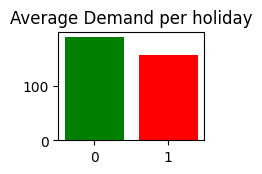

In [627]:
plt.subplot(3,3,3)
plt.title('Average Demand per holiday')
cat_list=bikes_prep['holiday'].unique()
cat_average=bikes_prep.groupby('holiday').mean()['demand']
plt.bar(cat_list, cat_average, color=colours)

<BarContainer object of 7 artists>

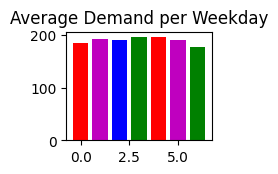

In [628]:
plt.subplot(3,3,4)
plt.title('Average Demand per Weekday')
cat_list=bikes_prep['weekday'].unique()
cat_average=bikes_prep.groupby('weekday').mean()['demand']
plt.bar(cat_list, cat_average, color=colours)

<BarContainer object of 2 artists>

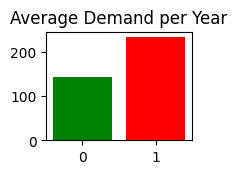

In [629]:
plt.subplot(3,3,5)
plt.title('Average Demand per Year')
cat_list=bikes_prep['year'].unique()
cat_average=bikes_prep.groupby('year').mean()['demand']
plt.bar(cat_list, cat_average, color=colours)

<BarContainer object of 24 artists>

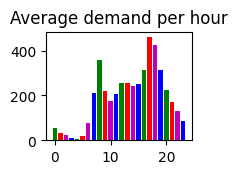

In [630]:
plt.subplot(3,3,6)
plt.title('Average demand per hour')
cat_list=bikes_prep['hour'].unique()
cat_average=bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list, cat_average, color=colours)

<BarContainer object of 2 artists>

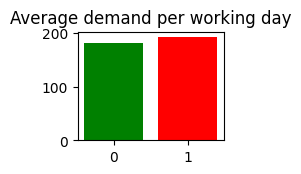

In [631]:
plt.subplot(3,3,7)
plt.title('Average demand per working day')
cat_list=bikes_prep['workingday'].unique()
cat_average=bikes_prep.groupby('workingday').mean()['demand']
plt.bar(cat_list, cat_average, color=colours)

<BarContainer object of 4 artists>

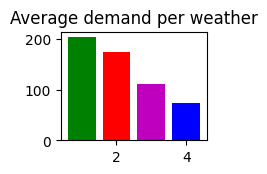

In [632]:
plt.subplot(3,3,8)
plt.title('Average demand per weather')
cat_list=bikes_prep['weather'].unique()
cat_average=bikes_prep.groupby('weather').mean()['demand']
plt.bar(cat_list, cat_average, color=colours)

In [633]:
#FEATURES TO BE DROPPED -WEEKDAY,YEAR, HOUR, WORKING DAY


<BarContainer object of 24 artists>

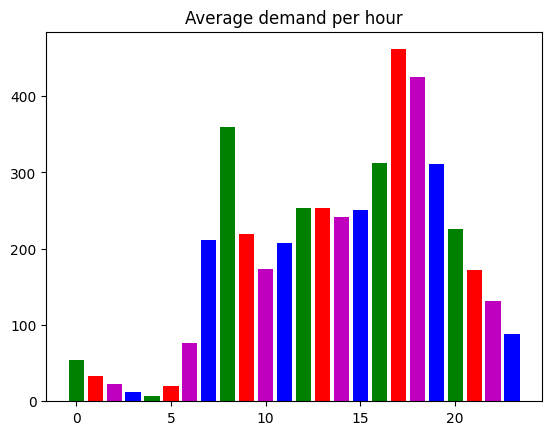

In [634]:
plt.title('Average demand per hour')
cat_list=bikes_prep['hour'].unique()
cat_average=bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list, cat_average, color=colours)
#MORE LIKE A TIME SERIES

In [635]:
#SUMMARY OF THE DATA VISUALIZATION


**Findings Summary **

1.   Demand is not normally distributed

2.   Temperature and Demand appears to have direct correlation
3.   The plot for temp and atemp appear almost identical
4.   Humidity and wind speed affect the demand but need more statistical analysis
5.   There is a variation in demand based on Season , MOnth , Holiday , hour and weather
6.   No significant change in demand due to workday or working Day
7. Year wise growth pattern not considered due to limited number of years




In [636]:
#Check for outliers

In [637]:
bikes_prep['demand'].describe()

,demand
count,17379.000000
mean,189.463088
std,181.387599
min,1.000000
25%,40.000000
50%,142.000000
75%,281.000000
max,977.000000


In [638]:
bikes_prep['demand'].describe()
bikes_prep['demand'].quantile([0.05,0.1,0.15, 0.9,0.95,0.99])

,demand
0.05,5.00
0.10,9.00
0.15,16.00
0.90,451.20
0.95,563.10
0.99,782.22


In [639]:
#Step 4- Check Multiple Linear Regression Assumptions
#Linearity using correlation coefficient matrix using Corr
correlation=bikes_prep[['temp','atemp', 'humidity','windspeed','demand']].corr()
correlation

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


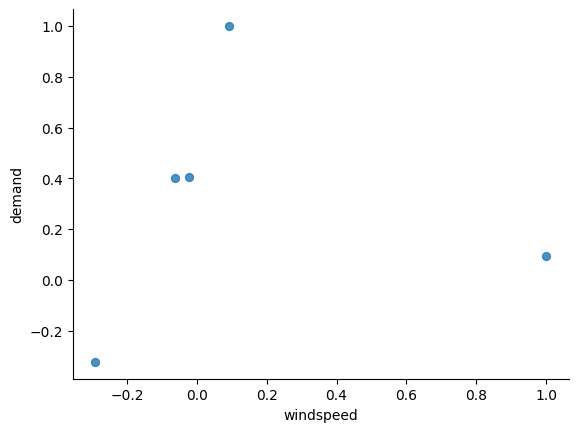

In [640]:
from matplotlib import pyplot as plt
correlation.plot(kind='scatter', x='windspeed', y='demand', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

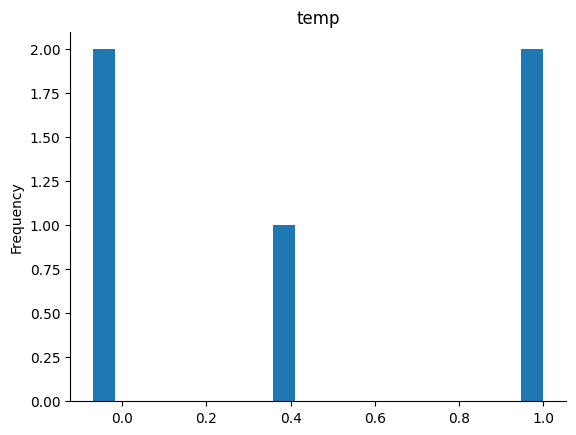

In [641]:
from matplotlib import pyplot as plt
correlation['temp'].plot(kind='hist', bins=20, title='temp')
plt.gca().spines[['top', 'right',]].set_visible(False)

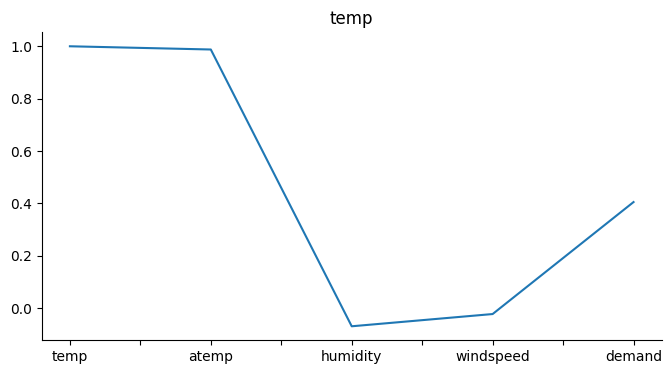

In [642]:
from matplotlib import pyplot as plt
correlation['temp'].plot(kind='line', figsize=(8, 4), title='temp')
plt.gca().spines[['top', 'right']].set_visible(False)

In [643]:
#Drop atemp, windspeed
bikes_prep=bikes_prep.drop(['atemp','windspeed','year','weekday','workingday'],axis=1)

In [644]:
#Check the autocorrelation - Values need to be type float  and not integer to check autocorrelation
df1=pd.to_numeric(bikes_prep['demand'],downcast='float')

In [645]:
df1

,demand
0,16.0
1,40.0
2,32.0
3,13.0
4,1.0
...,...
17374,119.0
17375,89.0
17376,90.0
17377,61.0


(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474795, 0.47049642, 0.49622893, 0.49404147, 0.46796018,
        0.47732133, 0.5267586 , 0.59145856, 0.65201694, 0.7151968 ,
        0.8059117 , 0.9253113 , 1.        , 0.9253113 , 0.8059117 ,
        0.7151968 , 0.65201694, 0.59145856, 0.5267586 , 0.47732133,
        0.46796018, 0.49404147, 0.49622893, 0.47049642, 0.45474795],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x7af0ccd31750>)

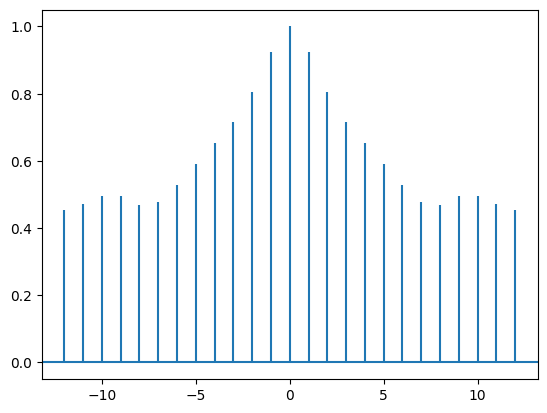

In [646]:
plt.acorr(df1,maxlags=12)

In [647]:
#THere is high autocorrelation for the demand feature


In [648]:
# Convert values to log normal distribution by using Log

<Axes: >

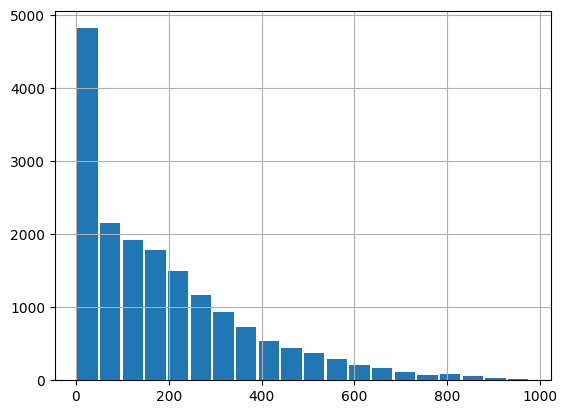

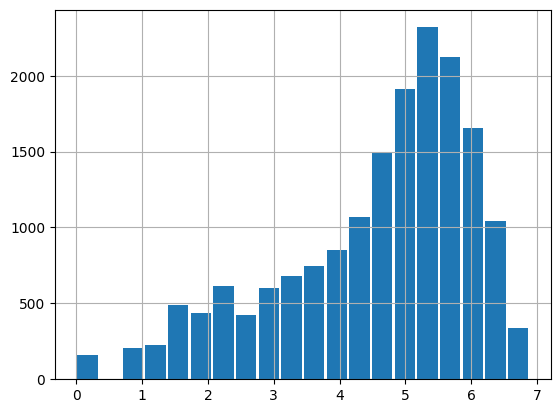

In [649]:
#SOLVING THE PROBLEM OF NORMALITY
#DEMAND IS NOT NORAMALLY DISTRIBUTED
df1=bikes_prep['demand']
df2=np.log(df1)

plt.figure()
df1.hist(rwidth=0.9, bins=20)

plt.figure()
df2.hist(rwidth=0.9, bins=20)

In [650]:
bikes_prep1=np.log(bikes_prep['demand'])

In [651]:
bikes_prep1

,demand
0,2.772589
1,3.688879
2,3.465736
3,2.564949
4,0.000000
...,...
17374,4.779123
17375,4.488636
17376,4.499810
17377,4.110874


array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'hour'}>],
       [<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'demand'}>, <Axes: >]], dtype=object)

<Figure size 640x480 with 0 Axes>

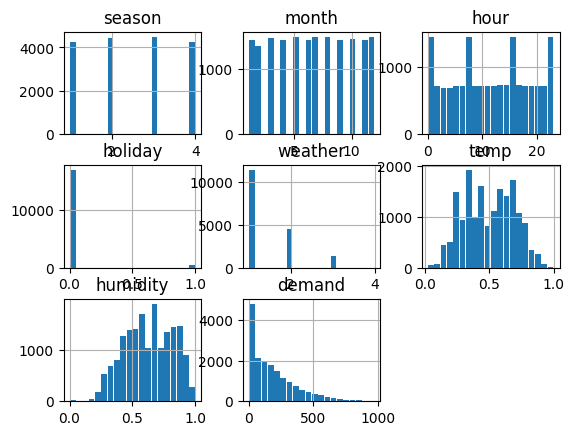

In [652]:
plt.figure()
bikes_prep.hist(rwidth=0.9 , bins=20)

In [653]:
bikes_prep

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1
...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,119
17375,1,12,20,0,2,0.26,0.60,89
17376,1,12,21,0,1,0.26,0.60,90
17377,1,12,22,0,1,0.26,0.56,61


In [654]:
# bikes_prep=pd.read_csv('/content/hour.csv')

In [655]:
# bikes_prep=bikes_prep.tolist()

In [656]:
#AUTOCORRELATION IN THE DEMAND COLUMN
t_1= bikes_prep['demand'].shift(+1).to_frame()
t_1.columns=['t-1']

In [657]:
t_1

,t-1
0,NaN
1,16.0
2,40.0
3,32.0
4,13.0
...,...
17374,122.0
17375,119.0
17376,89.0
17377,90.0


In [658]:
t_2=bikes_prep['demand'].shift(+2).to_frame()
t_2.columns=['t-2']

In [659]:
t_3=bikes_prep['demand'].shift(+3).to_frame()
t_3.columns=['t-3']

In [660]:
bikes_prep_lag=pd.concat([bikes_prep, t_1, t_2, t_3], axis=1)

In [661]:
bikes_prep_lag

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
0,1,1,0,0,1,0.24,0.81,16,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,40,16.0,NaN,NaN
2,1,1,2,0,1,0.22,0.80,32,40.0,16.0,NaN
3,1,1,3,0,1,0.24,0.75,13,32.0,40.0,16.0
4,1,1,4,0,1,0.24,0.75,1,13.0,32.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,119,122.0,164.0,214.0
17375,1,12,20,0,2,0.26,0.60,89,119.0,122.0,164.0
17376,1,12,21,0,1,0.26,0.60,90,89.0,119.0,122.0
17377,1,12,22,0,1,0.26,0.56,61,90.0,89.0,119.0


In [662]:
bikes_prep_lag=bikes_prep_lag.dropna()

In [663]:
bikes_prep_lag

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,13,32.0,40.0,16.0
4,1,1,4,0,1,0.24,0.75,1,13.0,32.0,40.0
5,1,1,5,0,2,0.24,0.75,1,1.0,13.0,32.0
6,1,1,6,0,1,0.22,0.80,2,1.0,1.0,13.0
7,1,1,7,0,1,0.20,0.86,3,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,119,122.0,164.0,214.0
17375,1,12,20,0,2,0.26,0.60,89,119.0,122.0,164.0
17376,1,12,21,0,1,0.26,0.60,90,89.0,119.0,122.0
17377,1,12,22,0,1,0.26,0.56,61,90.0,89.0,119.0


In [664]:
#STEP 7-Create Dummy Variables and drop first to avoid dummy variables trap using get_dummies


In [665]:
# dummy_df=pd.get_dummies(bikes_prep_lag, drop_first=True)

In [666]:
dummy_df

,index,season,year,month,hour,holiday,weekday,workingday,weather,temp,...,date_31-05-2011,date_31-05-2012,date_31-07-2011,date_31-07-2012,date_31-08-2011,date_31-08-2012,date_31-10-2011,date_31-10-2012,date_31-12-2011,date_31-12-2012
3,4,1,0,1,3,0,6,0,1,0.24,...,False,False,False,False,False,False,False,False,False,False
4,5,1,0,1,4,0,6,0,1,0.24,...,False,False,False,False,False,False,False,False,False,False
5,6,1,0,1,5,0,6,0,2,0.24,...,False,False,False,False,False,False,False,False,False,False
6,7,1,0,1,6,0,6,0,1,0.22,...,False,False,False,False,False,False,False,False,False,False
7,8,1,0,1,7,0,6,0,1,0.20,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,1,12,19,0,1,1,2,0.26,...,False,False,False,False,False,False,False,False,False,True
17375,17376,1,1,12,20,0,1,1,2,0.26,...,False,False,False,False,False,False,False,False,False,True
17376,17377,1,1,12,21,0,1,1,1,0.26,...,False,False,False,False,False,False,False,False,False,True
17377,17378,1,1,12,22,0,1,1,1,0.26,...,False,False,False,False,False,False,False,False,False,True


In [667]:
bikes_prep_lag.dtypes

,0
season,int64
month,int64
hour,int64
holiday,int64
weather,int64
temp,float64
humidity,float64
demand,int64
t-1,float64
t-2,float64


In [668]:
#FOR GET_DUMMY, WE NEED FEATURES TO BE OF TYPE CATEGORY

In [669]:
bikes_prep_lag['season']=bikes_prep_lag['season'].astype('category')

In [670]:
bikes_prep_lag['holiday']=bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weather']=bikes_prep_lag['weather'].astype('category')
bikes_prep_lag['month']=bikes_prep_lag['month'].astype('category')
bikes_prep_lag['hour']=bikes_prep_lag['hour'].astype('category')



In [671]:
bikes_prep_lag=pd.get_dummies(bikes_prep_lag, drop_first=True)

In [672]:
bikes_prep_lag

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,13,32.0,40.0,16.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.24,0.75,1,13.0,32.0,40.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,0.24,0.75,1,1.0,13.0,32.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6,0.22,0.80,2,1.0,1.0,13.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,0.20,0.86,3,2.0,1.0,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,119,122.0,164.0,214.0,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
17375,0.26,0.60,89,119.0,122.0,164.0,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
17376,0.26,0.60,90,89.0,119.0,122.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
17377,0.26,0.56,61,90.0,89.0,119.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [673]:
#STEP 8- Create train and test split
#SPLIT THE X AND Y DATASET INTO TRAINING AND TESTING SET

# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test=\
# train_test_split(X, Y, test_size=0.4, random_state=1234)

In [674]:
#Demand is time dependent or time series
Y=bikes_prep_lag[['demand']]

In [675]:
X=bikes_prep_lag.drop(['demand'], axis=1)

In [676]:
Y

,demand
3,13
4,1
5,1
6,2
7,3
...,...
17374,119
17375,89
17376,90
17377,61


In [677]:
X

,temp,humidity,t-1,t-2,t-3,season_2,season_3,season_4,month_2,month_3,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,32.0,40.0,16.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.24,0.75,13.0,32.0,40.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,0.24,0.75,1.0,13.0,32.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6,0.22,0.80,1.0,1.0,13.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,0.20,0.86,2.0,1.0,1.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,122.0,164.0,214.0,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
17375,0.26,0.60,119.0,122.0,164.0,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
17376,0.26,0.60,89.0,119.0,122.0,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
17377,0.26,0.56,90.0,89.0,119.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [678]:
#CREATE THE SIZE FOR 70% of the data
tr_size=0.7*len(X)
tr_size=int(tr_size)

In [679]:
X_train=X.values[0:tr_size]
X_train

array([[0.24, 0.75, 32.0, ..., False, False, False],
       [0.24, 0.75, 13.0, ..., False, False, False],
       [0.24, 0.75, 1.0, ..., True, False, False],
       ...,
       [0.68, 0.69, 150.0, ..., True, False, False],
       [0.66, 0.74, 137.0, ..., False, False, False],
       [0.64, 0.73, 78.0, ..., False, False, False]], dtype=object)

In [680]:
X_test=X.values[tr_size: len(X)]

In [681]:
Y_train=Y.values[0:tr_size]
Y_test=Y.values[tr_size: len(Y)]
Y_test

array([[36],
       [11],
       [ 7],
       ...,
       [90],
       [61],
       [49]])

Step 9= Fit and score the model
Linear Regression

In [682]:
from sklearn.linear_model import LinearRegression
std_reg=LinearRegression()
std_reg.fit(X_train, Y_train)
r2_train=std_reg.score(X_train, Y_train)
r2_test=std_reg.score(X_test, Y_test)
#Create Y predictions
Y_predict=std_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(Y_test, Y_predict))

In [683]:
rmse

82.67504354244683

In [684]:
#RMSLE= Add 1 to predicted value takes its log , do the same for actual value ==log(p+1)-log(a+1))**2


In [685]:
#Calculate RMSLE

In [686]:
# from sklearn.metrics import mean_squared_log_error

# # Calculate RMSLE
# rmsle = math.sqrt(mean_squared_log_error(Y_test, Y_predict))
# print(f'RMSLE: {rmsle}')

In [688]:
import math
Y_test_e=[]
Y_predict_e=[]
for i in range(0, len(Y_test)):
  Y_test_e.append(math.exp(Y_test[i]))
  Y_predict_e.append(math.exp(Y_predict[i]))

log_sq_sum=0.0
for i in range(0, len(Y_test_e)):
  log_a   =math.log(Y_test_e[i]+1)
  log_p=math.log(Y_predict_e[i]+1)
  log_diff=(log_p-log_a)**2
  log_sq_sum=log_sq_sum+log_diff

  rmsle=math.sqrt(log_sq_sum/len(Y_test))
  print(rmsle)

OverflowError: math range error